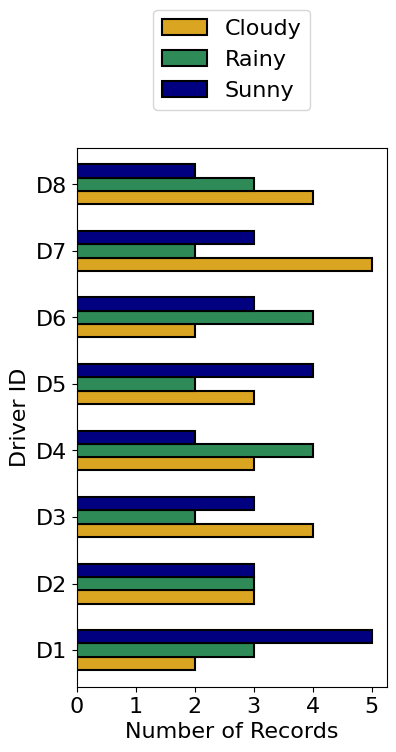

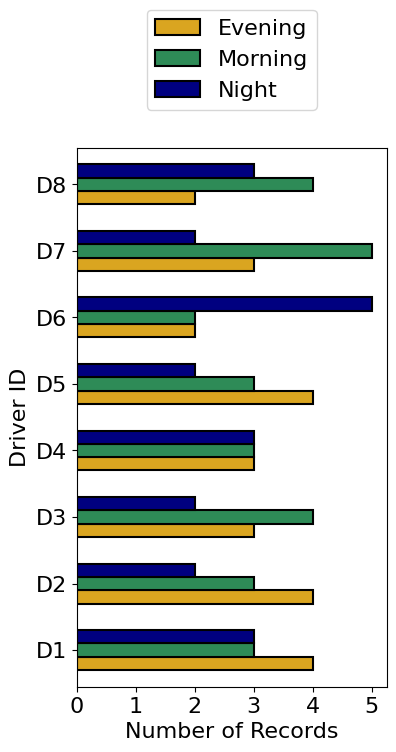

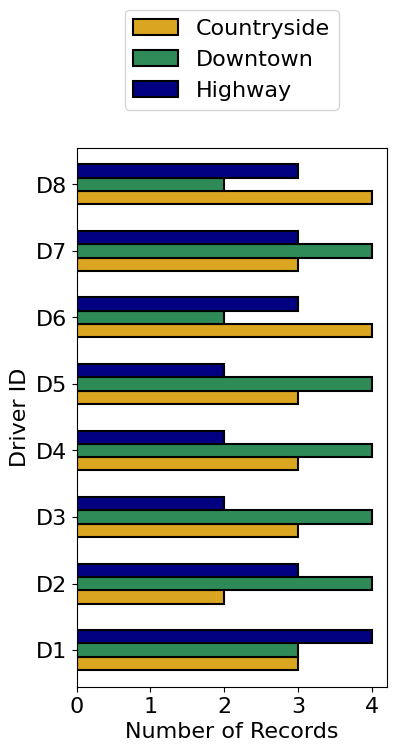

In [36]:
from matplotlib.ticker import MaxNLocator

figsize = (4, 7)
plt.rcParams.update({'font.size': 16})

# Bar plot 1 
fig, ax = plt.subplots(figsize=figsize)
grouped_data = data.groupby(['driver_id', 'weather']).size().unstack()
grouped_data.plot(kind='barh', ax=ax, color=colors, edgecolor='black', 
                  linewidth=1.5, width=0.6)
ax.set_ylabel('Driver ID')
ax.set_xlabel('Number of Records')
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation='horizontal')
plt.savefig("../../images/dreyeve/weather_distrib.pdf", bbox_inches='tight')
plt.show()

# Bar plot 2
fig, ax = plt.subplots(figsize=figsize)
grouped_data = data.groupby(['driver_id', 'time']).size().unstack()
grouped_data.plot(kind='barh', ax=ax, color=colors, edgecolor='black', 
                  linewidth=1.5, width=0.6)
ax.set_ylabel('Driver ID')
ax.set_xlabel('Number of Records')
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation='horizontal')
plt.savefig("../../images/dreyeve/time_distrib.pdf", bbox_inches='tight')
plt.show()

# Bar plot 3
fig, ax = plt.subplots(figsize=figsize)
grouped_data = data.groupby(['driver_id', 'area']).size().unstack()
grouped_data.plot(kind='barh', ax=ax, color=colors, edgecolor='black', 
                  linewidth=1.5, width=0.6)
ax.set_ylabel('Driver ID')
ax.set_xlabel('Number of Records')
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation='horizontal')
plt.savefig("../../images/dreyeve/area_distrib.pdf", bbox_inches='tight')
plt.show()

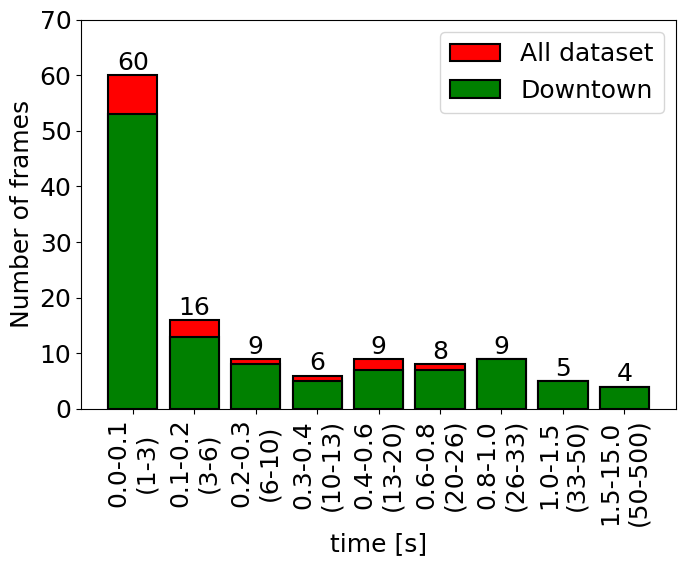

In [37]:
plt.rcParams.update({'font.size': 18})


dt_counts = np.array([31, 13, 9, 6, 3, 4, 1, 5, 2, 2, 2, 1, 1, 3, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1])
all_counts = np.array([33, 16, 11, 7, 4, 5, 2, 5, 2, 2, 3, 1, 3, 3, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1])
frames = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 21, 22, 23, 24, 25, 26, 27, 29, 31, 33, 34, 38, 45, 46, 48, 70, 77, 169, 425])
time = 0.03 * np.array(frames)
# ranges = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 15.0])
ranges = np.array([0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0, 1.5, 15.0])

range_labels = []
range_labels.append(f"0.0-{ranges[0]}\n(1-{int(1/0.03*ranges[0])})")
range_labels.extend([f"{ranges[i]}-{ranges[i+1]}\n({int(1/0.03*ranges[i])}-{int(1/0.03*ranges[i+1])})" for i in range(len(ranges)-1)])

top_range_labels = []
top_range_labels.append(f"0-{int(1 / 0.03 * ranges[0])}")
top_range_labels.extend([f"{int(1 / 0.03 * ranges[i])}-{int(1 / 0.03 * ranges[i+1])}" for i in range(len(ranges)-1)])

bins = np.digitize(time, ranges)
sums = np.zeros_like(ranges, dtype=np.int32)
for i in range(len(ranges)):
    sums[i] = dt_counts[bins == i].sum()

all_sums = np.zeros_like(ranges, dtype=np.int32)
for i in range(len(ranges)):
    all_sums[i] = all_counts[bins == i].sum()

# Bar plot 1
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(np.arange(len(all_sums)), all_sums, color='red', edgecolor='black', linewidth=1.5)
# Add counts on top of each bar
for bar in ax.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')
ax.bar(np.arange(len(sums)), sums, color='green', edgecolor='black', linewidth=1.5)
ax.set_xticks(np.arange(len(sums)))
ax.set_xticklabels(range_labels, rotation='90')


ax.set_xlabel('time [s]')
ax.set_ylabel('Number of frames')
ax.set_ylim(0, 70)

ax.legend(['All dataset', 'Downtown'], loc='upper right')
fig.tight_layout(rect=[0,0,.9,1]) 
plt.savefig("../../images/dreyeve/tracking_distrib.pdf", bbox_inches='tight')

9


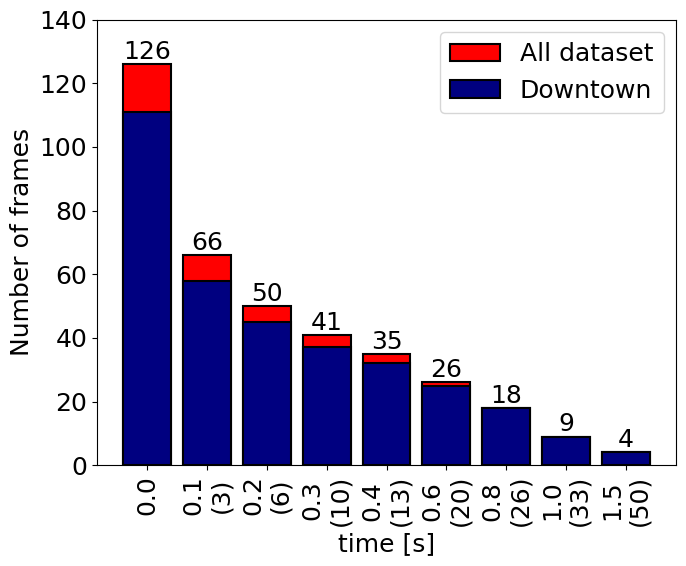

In [38]:
plt.rcParams.update({'font.size': 18})


dt_counts = np.array([31, 13, 9, 6, 3, 4, 1, 5, 2, 2, 2, 1, 1, 3, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1])
all_counts = np.array([33, 16, 11, 7, 4, 5, 2, 5, 2, 2, 3, 1, 3, 3, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1])
frames = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 21, 22, 23, 24, 25, 26, 27, 29, 31, 33, 34, 38, 45, 46, 48, 70, 77, 169, 425])
time = 0.03 * np.array(frames)
ranges = np.array([0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0, 1.5, 15.0])

range_labels = [f"0.0"]
range_labels.extend([f"{ranges[i]}\n({int(1/0.03*ranges[i])})" for i in range(len(ranges)-1)])

top_range_labels = []
top_range_labels.append(f"0-{int(1 / 0.03 * ranges[0])}")
top_range_labels.extend([f"{int(1 / 0.03 * ranges[i])}-{int(1 / 0.03 * ranges[i+1])}" for i in range(len(ranges)-1)])

bins = np.digitize(time, ranges)
sums = np.zeros_like(ranges, dtype=np.int32)
for i in range(len(ranges)):
    sums[i] = dt_counts[bins == i].sum()

all_sums = np.zeros_like(ranges, dtype=np.int32)
for i in range(len(ranges)):
    all_sums[i] = all_counts[bins == i].sum()

sums_cum = [sum(sums[i::]) for i in range(len(sums))]
all_sums_cum = [sum(all_sums[i::]) for i in range(len(all_sums))]


# Bar plot 1
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(np.arange(len(all_sums_cum)), all_sums_cum, color='red', edgecolor='black', linewidth=1.5)
# Add counts on top of each bar
for bar in ax.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')
ax.bar(np.arange(len(sums_cum)), sums_cum, color='navy', edgecolor='black', linewidth=1.5)
ax.set_xticks(np.arange(len(sums)))
ax.set_xticklabels(range_labels, rotation='90')
print(len(range_labels))


ax.set_xlabel('time [s]')
ax.set_ylabel('Number of frames')
ax.set_ylim(0, 140)

ax.legend(['All dataset', 'Downtown'], loc='upper right')
fig.tight_layout(rect=[0,0,.9,1]) 
plt.savefig("../../images/dreyeve/tracking_distrib_cum.pdf", bbox_inches='tight')